## Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm
%matplotlib inline

## Preprocessing for depth images

In [2]:
image_path = 'sample-reality-data/extracted_depth_frames/'
image_list = os.listdir(image_path)
print('Number of frames: ', len(image_list))

Number of frames:  305


In [3]:
import cv2

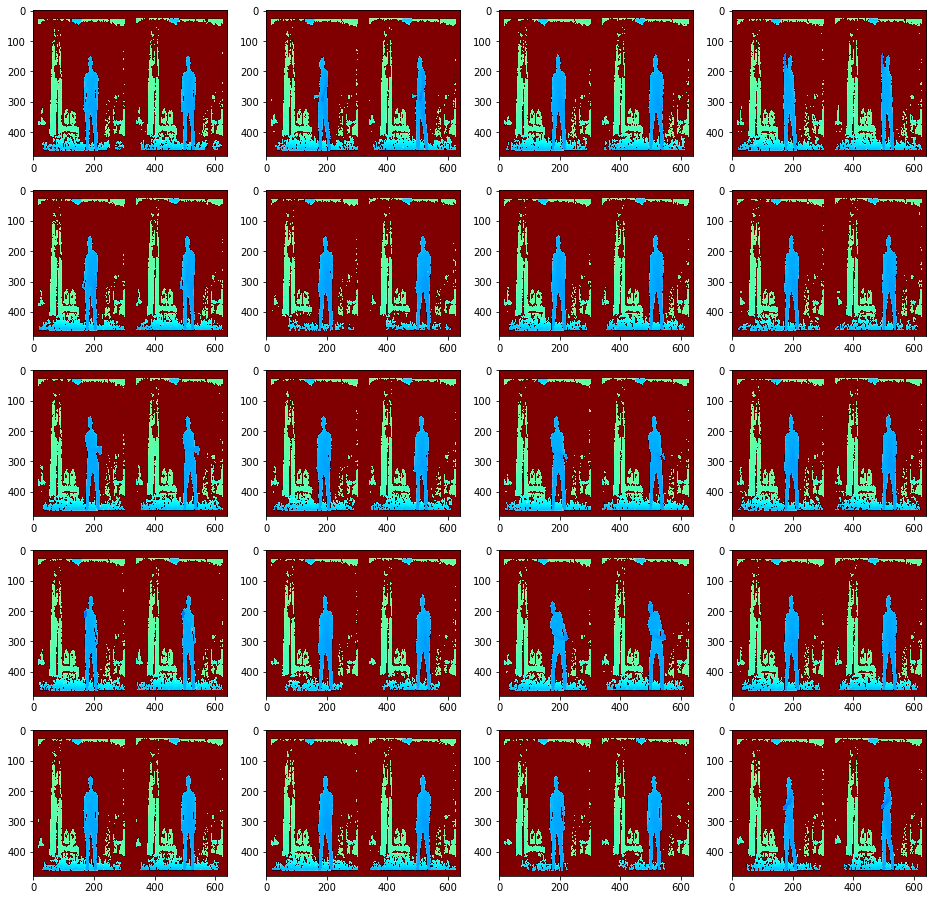

In [4]:
# Visualize some depth images
fig = plt.figure(figsize=(16,16))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
    img = cv2.imread(os.path.join(image_path, image_list[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [7]:
image_list = sorted(image_list)

## Trash code, don't mind about it, those code is for only testing purpose

In [19]:
# subtracted_means = []
saved_depth_info = []
# first_frame = cv2.imread(os.path.join(image_path, image_list[0]))
for i in range(len(image_list)):
    next_frame = cv2.imread(os.path.join(image_path, image_list[i]))
#     subtracted_means.append(np.mean(next_frame - first_frame))
    saved_depth_info.append(next_frame)
# print(len(subtracted_means))
saved_depth_info = np.asarray(saved_depth_info)
np.save('saved_depth_info.npy', saved_depth_info)

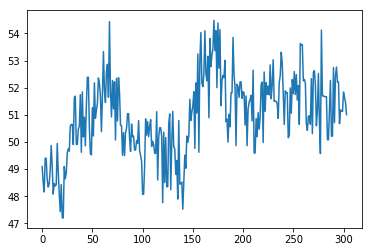

In [12]:
plt.plot(subtracted_means)

In [14]:
from scipy.ndimage.filters import gaussian_filter

In [20]:
x_filtered = gaussian_filter(saved_depth_info, sigma=7)

In [21]:
res_filtered = []
for i in range(1, x_filtered.shape[0]):
    res_filtered.append(np.mean(x_filtered[i]-x_filtered[0]))

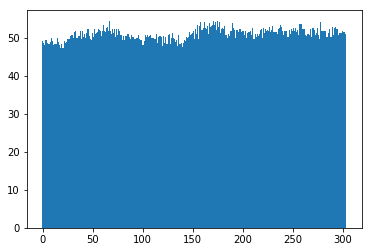

In [22]:
s = 'saved_depth_info.npy'
x = np.load(s)
res = []
for i in range(1, x.shape[0]):
    res.append(np.mean(x[i]-x[0]))
xs = [i for i in range(len(res))]
ys = [ys_i for _, ys_i in enumerate(res)]
plt.bar(xs, ys, width=1)
plt.show()